In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("fake_news_dataset.csv")
print("Data Size:", df.shape)

Data Size: (1000, 6)


In [3]:
df.columns

Index(['Sensationalism_Score', 'Source_Trust_Rating', 'Exclamation_Count',
       'Word_Count', 'Author_Verified', 'Is_Fake'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sensationalism_Score  1000 non-null   float64
 1   Source_Trust_Rating   1000 non-null   float64
 2   Exclamation_Count     1000 non-null   int64  
 3   Word_Count            1000 non-null   float64
 4   Author_Verified       1000 non-null   int64  
 5   Is_Fake               1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [15]:
x=df.drop('Is_Fake',axis=1)
y=df['Is_Fake']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
y_train.shape

(800,)

In [13]:
x_train.shape

(800, 5)

In [16]:
x_test.shape

(200, 5)

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
print("training data shape:", x_train.shape)
print("test data size:",x_test.shape)

training data shape: (800, 5)
test data size: (200, 5)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
log_model=LogisticRegression()
log_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [24]:
y_pred_log = log_model.predict(x_test_scaled)

In [25]:
acc_log = accuracy_score(y_test,y_pred_log)
print("Logistic Regression Accuracy:", acc_log)


Logistic Regression Accuracy: 0.87


In [26]:
cm= confusion_matrix(y_test,y_pred_log)
print("confusion matrix:\n",cm)

confusion matrix:
 [[103  11]
 [ 15  71]]


In [28]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [29]:
print(TP)
print(TN)
print(FP)
print(FN)

71
103
11
15


In [30]:
precision = TP / (TP + FP)
print("Precision:", precision)


Precision: 0.8658536585365854


In [31]:
recall = TP / (TP + FN)
print("Recall:", recall)


Recall: 0.8255813953488372


In [35]:
float(TN/(TN+TP))

0.5919540229885057

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

tree_model=DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, criterion="gini", random_state=42)

In [38]:
tree_model.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
acc_tree=accuracy_score(y_test,y_pred_tree)
print("Decision Tree Accuracy:", acc_tree)

Decision Tree Accuracy: 0.83


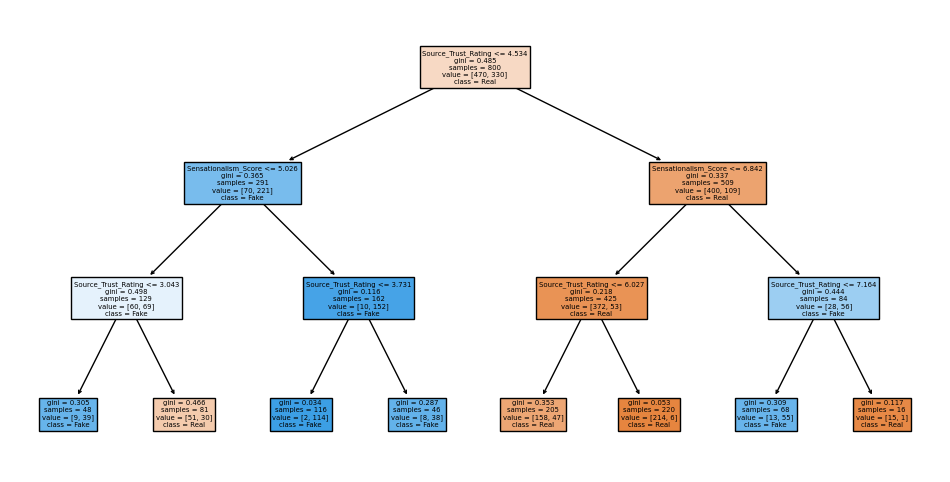

In [41]:
plt.figure(figsize=(12, 6))
plot_tree(tree_model,feature_names=x.columns,class_names=['Real','Fake',],filled=True)
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=10,min_samples_leaf=5,max_features="sqrt",random_state=42)

In [45]:
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
acc_rf=accuracy_score(y_test,y_pred_rf)
print("Random Forest Accuracy",acc_rf)

importances=pd.Series(rf_model.feature_importances_,index=x.columns)
print("\n Most Important Clues for Detecting Fake News:")
print(importances.sort_values(ascending=False))

Random Forest Accuracy 0.865

 Most Important Clues for Detecting Fake News:
Source_Trust_Rating     0.530128
Sensationalism_Score    0.310864
Exclamation_Count       0.070113
Word_Count              0.060317
Author_Verified         0.028578
dtype: float64
